In [7]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.vector_ar.vecm import coint_johansen

### 15.5.1 Cointegration Analysis of Midcap Prices

In [3]:
data = pd.read_csv('../data/midcapD.ts.csv', index_col=0, parse_dates=[0])
data.head()

,LSCC,CSGS,EC,NYB,ALTR,APH,CLS,NET,SBUX,AYE,...,SBL,PCZ,OSI,TRP,ROH,SU,MTD,RAD,GUC,market
X.Y..m..d,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.031167,0.051724,-0.019868,-0.009217,0.058008,0.010329,-0.040541,-0.016393,0.016753,-0.037123,...,-0.000983,-0.021739,-0.019277,0.007143,-0.007680,-0.017964,-0.073650,0.067416,0.002183,-0.007124
2000-01-04,-0.075241,-0.023845,-0.050676,-0.032558,-0.050060,-0.034387,-0.115023,-0.064286,-0.031686,0.012048,...,-0.083661,-0.017778,0.007371,-0.014184,-0.017028,0.033537,-0.021201,-0.042105,-0.032135,-0.039521
2000-01-05,-0.025730,-0.003053,0.021352,-0.002404,-0.011292,-0.022137,-0.071618,0.012723,0.013089,0.045238,...,-0.066595,0.063348,0.000000,0.000000,0.061417,0.085546,-0.021661,-0.021978,-0.018571,-0.000856
2000-01-06,-0.049251,-0.050536,0.027875,0.002410,-0.025381,-0.027559,0.002857,-0.042714,0.036176,-0.009112,...,-0.024166,-0.021277,-0.004878,0.000000,0.037092,-0.027174,0.022140,-0.033708,-0.018349,-0.007353
2000-01-07,0.041291,-0.008065,0.013559,0.002404,0.104167,0.010121,0.048433,0.055118,-0.004988,0.002299,...,-0.003538,-0.004348,-0.031863,-0.035971,0.072961,0.006983,0.028881,0.023256,0.032710,0.032511


In [18]:
prices = np.exp(np.cumsum(data.iloc[:, :10], axis=0))

In [66]:
def johansen_summary(res):
    d = len(res.max_eig_stat)
    return pd.DataFrame({
        'hypothesis': [f'r <= {i}' if i > 0 else 'r = 0' for i in range(d)],
        'test': res.max_eig_stat,
        '10pct': res.max_eig_stat_crit_vals[:, 0],
        '5pct': res.max_eig_stat_crit_vals[:, 1],
        '1pct': res.max_eig_stat_crit_vals[:, 2],
    })

In [67]:
res = coint_johansen(prices, det_order=-1, k_ar_diff=2)
johansen_summary(res)

,hypothesis,test,10pct,5pct,1pct
0,r = 0,42.729262,57.7954,61.0404,67.6415
1,r <= 1,34.042894,51.8528,54.9629,61.3449
2,r <= 2,24.822775,45.8930,48.8795,55.0335
3,r <= 3,20.838499,39.9085,42.7679,48.6606
4,r <= 4,14.863683,33.9271,36.6301,42.2333
5,r <= 5,12.841105,27.9160,30.4428,35.7359
6,r <= 6,9.056691,21.8370,24.1592,29.0609
7,r <= 7,7.326792,15.7175,17.7961,22.2519
8,r <= 8,4.320931,9.4748,11.2246,15.0923
9,r <= 9,1.425430,2.9762,4.1296,6.9406


#### Problem 1

None of the null hypothesis is rejected, suggesting that no cointegration vectors are found.

### 15.5.2 Cointegration Analysis of Yields

In [70]:
data = pd.read_csv('../data/mk.zero2.csv', index_col=0, parse_dates=[0])
data.head()

,M.1,M.2,M.3,M.4,M.5,M.6,M.7,M.8,M.9,M.10,...,M.46,M.47,M.48,M.49,M.50,M.51,M.52,M.53,M.54,M.55
X.Y..m..d,,,,,,,,,,,,,,,,,,,,,
1985-08-01,0.07242,0.07212,0.07271,0.07372,0.07469,0.07546,0.07609,0.07670,0.07734,0.07808,...,0.10108,0.09997,0.09908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-09-01,0.07109,0.07189,0.07255,0.07314,0.07375,0.07443,0.07519,0.07603,0.07696,0.07799,...,0.10125,0.10027,0.09966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-01,0.07165,0.07297,0.07354,0.07389,0.07439,0.07509,0.07580,0.07638,0.07678,0.07714,...,0.09463,0.09565,0.09836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-11-01,0.06592,0.07164,0.07381,0.07404,0.07411,0.07460,0.07529,0.07595,0.07645,0.07682,...,0.09514,0.09397,0.09312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-12-01,0.06237,0.06895,0.07169,0.07228,0.07256,0.07297,0.07344,0.07386,0.07419,0.07446,...,0.09041,0.08891,0.08755,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Problem 2

Short maturities from 1 to 10 months are used:

In [75]:
maturities = pd.read_csv('../data/mk.maturity.csv')
maturities[:10] * 12

,Maturity
0,0.996
1,2.004
2,3.000
3,3.996
4,5.004
5,6.000
6,6.996
7,8.004
8,9.000
9,9.996


#### Problem 3

Using 1% level tests identifies 2 cointegration vectors:

In [76]:
johansen_summary(coint_johansen(data.iloc[:, :10], det_order=-1, k_ar_diff=2))

,hypothesis,test,10pct,5pct,1pct
0,r = 0,90.319188,57.7954,61.0404,67.6415
1,r <= 1,64.716939,51.8528,54.9629,61.3449
2,r <= 2,54.155352,45.8930,48.8795,55.0335
3,r <= 3,32.459247,39.9085,42.7679,48.6606
4,r <= 4,28.815666,33.9271,36.6301,42.2333
5,r <= 5,24.588676,27.9160,30.4428,35.7359
6,r <= 6,14.774660,21.8370,24.1592,29.0609
7,r <= 7,10.917143,15.7175,17.7961,22.2519
8,r <= 8,5.045418,9.4748,11.2246,15.0923
9,r <= 9,0.636128,2.9762,4.1296,6.9406


### 15.5.3 Cointegration Analysis of Daily Stock Prices

In [78]:
data = pd.read_csv('../data/CokePepsi.csv', sep='\t')
data.head()

,KO.Adjusted,PEP.Adjusted
0,20.52,53.31
1,20.53,53.67
2,20.39,53.50
3,20.52,53.62
4,20.54,53.84


#### Problem 4

The price time series appear cointegrated based on the plots:

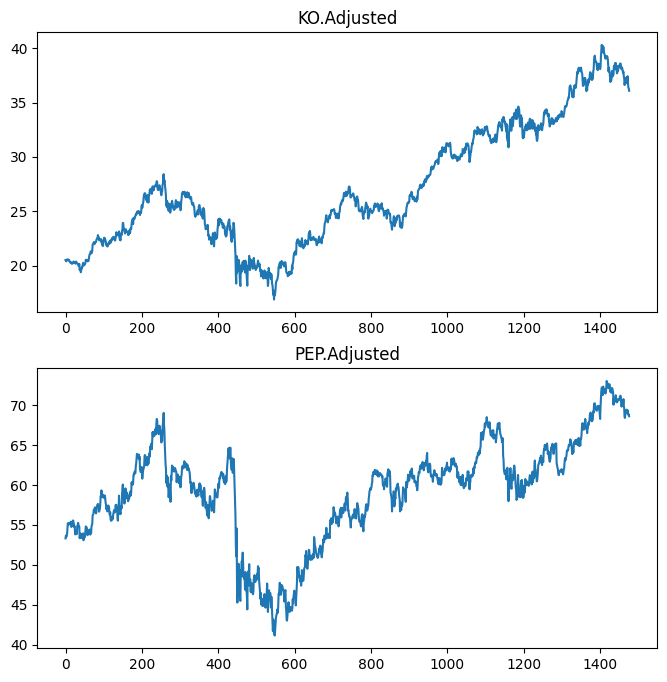

In [84]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
for i, col in enumerate(data.columns):
    axs[i].plot(data[col]);
    axs[i].set_title(col);

#### Problem 5

The price difference appears to be mean-reverting to a level around 32-33, however it is difficult to conclude from the plot if it is stationary:

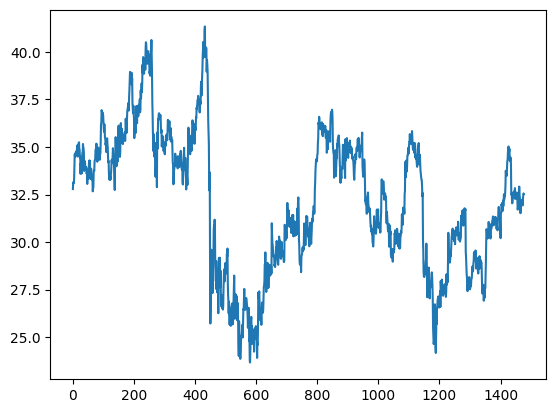

In [87]:
fig, ax = plt.subplots()
ax.plot(data['PEP.Adjusted'] - data['KO.Adjusted']);

#### Problem 6

Based on the results of the Johansen test, the two time series are not cointegrated:

In [89]:
johansen_summary(coint_johansen(data, det_order=-1, k_ar_diff=2))

,hypothesis,test,10pct,5pct,1pct
0,r = 0,2.669295,9.4748,11.2246,15.0923
1,r <= 1,1.206100,2.9762,4.1296,6.9406


#### Problem 7

In [100]:
data = pd.read_csv('../data/Stock_FX_Bond.csv')
data.head()

,Date,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,MRK_Volume,...,SP_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield,$/Euro,Yen/$,Brazil Real/$
0,2-Jan-87,922200,11.45,2540100,2.31,1130400,3.66,1218400,3.38,14454000,...,91880000,5.86,6.48,7.18,7.44,8.49,9.97,NaN,158.25,NaN
1,5-Jan-87,2100000,11.73,8670000,2.40,3032800,3.70,1752000,3.48,11538000,...,181900000,5.85,6.41,7.08,7.35,8.44,9.90,NaN,159.40,NaN
2,6-Jan-87,2720000,11.77,6992000,2.43,6614400,3.74,1206400,3.48,14279400,...,189300000,5.85,6.42,7.08,7.36,8.41,9.86,NaN,158.78,NaN
3,7-Jan-87,2000400,11.83,7621200,2.53,4233600,3.78,2188000,3.45,13003200,...,190900000,5.78,6.37,7.05,7.33,8.40,9.82,NaN,158.05,NaN
4,8-Jan-87,2460000,11.66,5807500,2.51,3816800,3.82,2195200,3.44,16320600,...,194500000,5.78,6.36,7.04,7.31,8.37,9.76,NaN,158.23,NaN


At 1% level, the Johansen test does not identify cointegrated vectors:

In [103]:
johansen_summary(coint_johansen(data.iloc[:, 2:21:2], det_order=-1, k_ar_diff=2))

,hypothesis,test,10pct,5pct,1pct
0,r = 0,67.357528,57.7954,61.0404,67.6415
1,r <= 1,44.001302,51.8528,54.9629,61.3449
2,r <= 2,39.286669,45.8930,48.8795,55.0335
3,r <= 3,34.652217,39.9085,42.7679,48.6606
4,r <= 4,30.544753,33.9271,36.6301,42.2333
5,r <= 5,25.928491,27.9160,30.4428,35.7359
6,r <= 6,16.958686,21.8370,24.1592,29.0609
7,r <= 7,13.945114,15.7175,17.7961,22.2519
8,r <= 8,7.107390,9.4748,11.2246,15.0923
9,r <= 9,1.141663,2.9762,4.1296,6.9406


**NB** The R implementation reports 2 vectors in this case. The difference needs to be investigated.

#### Problem 8

Using 8 lags, the test still does not identify cointegrated vectors:

In [104]:
johansen_summary(coint_johansen(data.iloc[:, 2:21:2], det_order=-1, k_ar_diff=8))

,hypothesis,test,10pct,5pct,1pct
0,r = 0,64.301539,57.7954,61.0404,67.6415
1,r <= 1,46.759203,51.8528,54.9629,61.3449
2,r <= 2,41.292829,45.8930,48.8795,55.0335
3,r <= 3,32.328214,39.9085,42.7679,48.6606
4,r <= 4,30.176211,33.9271,36.6301,42.2333
5,r <= 5,22.193641,27.9160,30.4428,35.7359
6,r <= 6,19.435965,21.8370,24.1592,29.0609
7,r <= 7,11.874152,15.7175,17.7961,22.2519
8,r <= 8,7.149947,9.4748,11.2246,15.0923
9,r <= 9,1.477186,2.9762,4.1296,6.9406


**NB** The R implementation reports 1 vector in this case. The difference needs to be investigated.

### 15.5.4 Simulation

In [171]:
rng = np.random.default_rng(12345)

In [337]:
samples = 1_000_000
days = 200
mu = 1_030_000
phi = 0.99
sigma = 5000
initial_position = 1_000_000
investment = 50_000
exit_threshold = 20_000

In [338]:
def price_via_convolve(eps):
    sum_eps = convolve2d(eps, phi ** np.arange(days).reshape(1, -1))[:, :days]
    deviation = sum_eps + (initial_position - mu) * phi ** (np.arange(days) + 1).reshape(1, -1)
    deviation = deviation
    return np.hstack([np.repeat(initial_position, samples).reshape(-1, 1), mu + deviation])

In [339]:
def price_via_iteration(eps):
    p = np.zeros((samples, days + 1))
    p[:, 0] = np.repeat(initial_position - mu, samples)
    for i in range(days):
        p[:, i + 1] = p[:, i] * phi + eps[:, i]
    return p + mu

In [353]:
%time eps = rng.normal(size=(samples, days), scale=sigma)

TypeError: normal() got an unexpected keyword argument 'random_state'

In [341]:
# this is very slow, despite vectorisation
# %time p1 = price_via_convolve(eps)

In [342]:
%time p = price_via_iteration(eps)

CPU times: user 5.04 s, sys: 187 ms, total: 5.23 s
Wall time: 5.23 s


In [343]:
# check if the calculations via iteration and vectorisation agree
# p.allclose(p1, p)

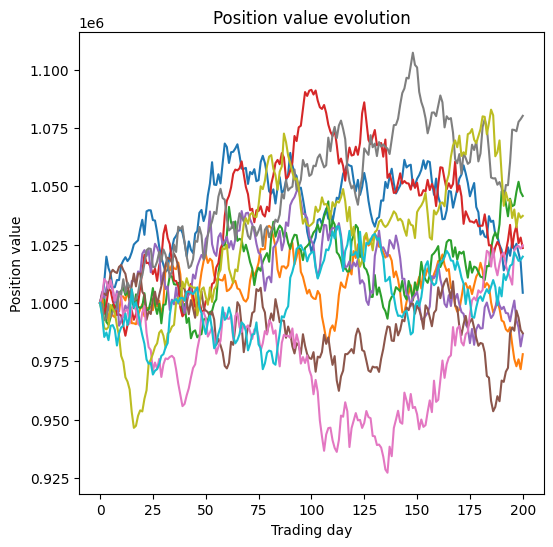

In [344]:
selected_samples = rng.choice(p.shape[0], size=10)

fig, axs = plt.subplots(1, 1, figsize=(6, 6))

axs.plot(p[selected_samples].T);
axs.set_title('Position value evolution');
axs.set_xlabel('Trading day');
axs.set_ylabel('Position value');

In [345]:
def find_first_hit(condition, price):
    any_hit = condition.any(axis=1)
    hit_idx = np.argmax(condition, axis=1)
    price_at_hit = np.where(any_hit, price[np.arange(price.shape[0]), hit_idx], np.nan)
    hit_idx_adj = np.where(any_hit, hit_idx, np.nan)
    return any_hit, hit_idx_adj, price_at_hit

In [346]:
early_loss, early_loss_idx, early_loss_price = find_first_hit(p < initial_position - investment, p)
early_gain, early_gain_idx, early_gain_price = find_first_hit(p >= initial_position + exit_threshold, p)

In [347]:
sell_price = np.where(
    early_loss & ((~early_gain) | (early_loss_idx < early_gain_idx)),
    early_loss_price,
    np.where(early_gain, early_gain_price, p[:, -1])
)
sell_day = np.where(
    early_loss & ((~early_gain) | (early_loss_idx < early_gain_idx)),
    early_loss_idx,
    np.where(early_gain, early_gain_idx, days)
)

Probability of reaching the end of the simulation period with the position unliquidated:

In [348]:
np.mean(sell_day == days)

0.013217

#### Problem 9

The expected profit is:

In [349]:
np.mean(sell_price - initial_position)

15673.177894757857

#### Problem 10

The probability of an early loss:

In [350]:
p_early_loss = (early_loss & ((~early_gain) | (early_loss_idx < early_gain_idx))).sum() / samples
p_early_loss

0.090503

#### Problem 11

The expected waiting time until liquidation:

In [351]:
np.mean(sell_day)

43.6703

#### Problem 12

The expected yearly return on the investment is:

In [352]:
np.mean((sell_price - initial_position) / investment / (sell_day / 253))

6.039086961634935